<a href="https://colab.research.google.com/github/anelglvz/Working-Analyst/blob/main/Matem%C3%A1ticas_CD/Maximize_Revenues_with_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling Algorithm

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy.stats as ss

See this for more details: https://en.wikipedia.org/wiki/Conjugate_prior

## 1. Thompson Sampling for binomial distributed Revenues with beta apriori



###Data and Strategies

In [ ]:
N = 10000   # number of rounds - customer visiting web page with Ad
d = 9       # number of strategies

In [ ]:
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]

In [ ]:
# Create the reward matrix (num of rounds x result for each strategy)
np.random.seed(4)
rewards = np.zeros((N,d))
# populate matrix according to the conversion rates
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:   # np.random.rand(d0, d1, ..., dn) returns Random values [0,1[ in a given shape d0xd1x...
            rewards[i,j] = 1

In [ ]:
print(rewards)
print(rewards.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 9)


Beta Distribution

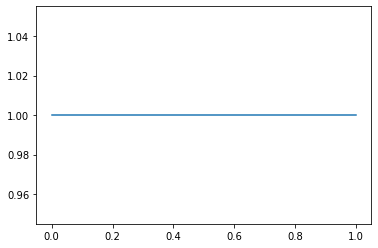

In [ ]:
xaux = np.linspace(0,1,100)
yaux = ss.beta.pdf(xaux,1,1)
plt.plot(xaux,yaux)

###Implement random strategy and Thompson Sampling for comparison

In [ ]:
selected_strategies_random = []
selected_strategies_thompson = []
total_rewards_random = 0
total_rewards_thompson = 0
numbers_of_rewards_1 = np.zeros(d)
numbers_of_rewards_0 = np.zeros(d)
reward_per_strategy = np.zeros(d)
regret_curve_random = []
regret_curve_thompson = []

for n in range(N):
    
    # Random strategy
    selected_strategy_random = random.randrange(d)
    selected_strategies_random.append(selected_strategy_random)
    total_rewards_random+= rewards[n,selected_strategy_random]
    
    # Thompson Sampling Strategy
    max_random_beta = 0
    startegy_with_max_beta = 0
    random_beta = np.zeros(d)
    
    # for each strategy, random draw from beta distribution with 2 parameters then select highest
    for i in range(d):
        random_beta[i] = ss.beta.rvs(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1) # return value in range 0,1
        startegy_with_max_beta_draw = np.argmax(random_beta)
        max_random_beta = random_beta[startegy_with_max_beta_draw]

    # Update Beta distribution parameters of selected strategy
    if rewards[n,startegy_with_max_beta_draw]==1:
        numbers_of_rewards_1[startegy_with_max_beta_draw]+=1
    else:
        numbers_of_rewards_0[startegy_with_max_beta_draw]+=1

  # Update Thompson sampling strategy KPIs
    selected_strategies_thompson.append(startegy_with_max_beta_draw)
    total_rewards_thompson += rewards[n,startegy_with_max_beta_draw]
    
    # Score per strategy
    for i in range(d):
        reward_per_strategy[i] +=rewards[n, i]
    
    # Regret as the difference between slected strategy and best strategy
    regret = max(reward_per_strategy) - total_rewards_random
    regret_curve_random.append(regret)
    regret = max(reward_per_strategy) - total_rewards_thompson
    regret_curve_thompson.append(regret)

###Measure performance


In [ ]:
# Computing the Absolute and Relative Return
# in absolute monetary value assuming 1K€ extra revenue for each premium plan
absolute_return = (total_rewards_thompson - total_rewards_random) 
# profit increase in % vs random strategy
relative_return = (total_rewards_thompson - total_rewards_random) / total_rewards_random * 100

In [ ]:
print(f'Performance achieved over {N} samples and the assumed strategy conversion rate:')
print('Absolute return: {:.0f}K€ extra profits'.format(absolute_return))
print('Relative return: {:.0f} % profit increase'.format(relative_return))

Performance achieved over 10000 samples and the assumed strategy conversion rate:
Absolute return: 902K€ extra profits
Relative return: 90 % profit increase


###Plot histogram of selected strategies

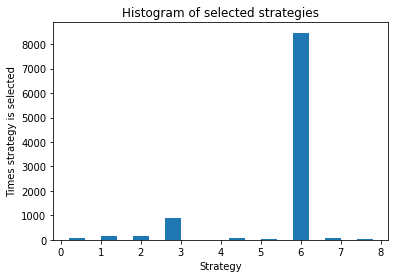

In [ ]:
plt.hist(selected_strategies_thompson, align='mid', rwidth=0.5)
plt.title('Histogram of selected strategies')
plt.xlabel('Strategy')
plt.ylabel('Times strategy is selected')
plt.show()

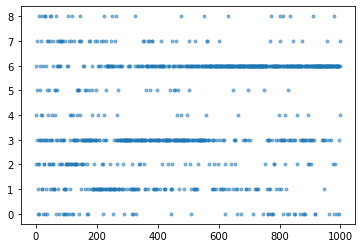

In [ ]:
plt.scatter(range(1000), selected_strategies_thompson[:1000], marker='.', alpha=0.5)

In [ ]:
def plot_scatter(k):
    plt.scatter(range(10*k,10*k+10), selected_strategies_thompson[10*k:10*k+10], marker='.', c='b', alpha=0.5)

In [ ]:
# initialize a writer which uses ffmpeg and records at 20 fps with a bitrate of 1800
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

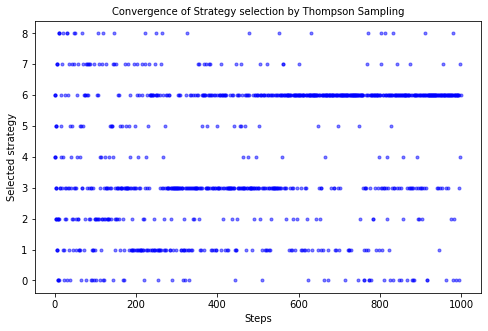

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.xlabel('Steps',fontsize=10)
plt.title('Convergence of Strategy selection by Thompson Sampling',fontsize=10)
plt.ylabel('Selected strategy',fontsize=10)
ani = matplotlib.animation.FuncAnimation(fig, plot_scatter, frames=100, repeat=True)
#plt.show()
ani.save('thompsonsampling.mp4', writer=writer)

###Regret curves

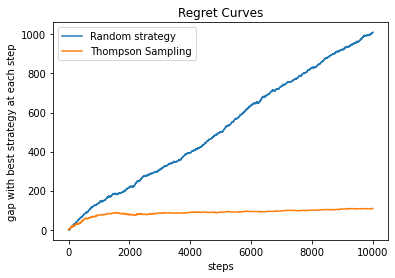

In [ ]:
plt.plot(regret_curve_random, label='Random strategy')
plt.plot(regret_curve_thompson, label='Thompson Sampling')
plt.title('Regret Curves')
plt.legend(loc='upper left')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.show()

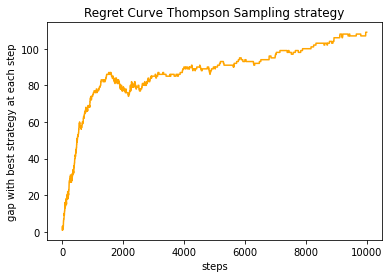

In [ ]:
plt.plot(range(N), regret_curve_thompson, color='orange')
plt.title('Regret Curve Thompson Sampling strategy')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.show()

## 2. Thompson Sampling for normally distributed Revenues with variance known with normal apriori

Now, we can consider a Revenues such that $X \sim N(\mu,σ^2)$ and normal distribution for apriori.

###Data and Strategies

In [ ]:
N = 10000
d = 6
mu = [9.5,7.3,5.8,9.9,8.8,7.1]
sigma = 4

rewards = np.zeros([N,d])
for j in range(N):
  for i in range(d):
    rewards[j,i] = ss.norm.rvs(mu[i], sigma)

print(rewards)

In [ ]:
reward_per_strategy = np.mean(rewards, axis = 0)
print(reward_per_strategy)

###Implement Thompson Sampling

In [ ]:
theta = np.zeros(d)
mu0 = 5
mus = [mu0]*d
selected_strategies_thompson = []
sigma0 = 1
sigs = [sigma0]*d

for n in range(N):
  for i in range(d):
    theta[i] = ss.norm.rvs(mus[i],sigs[i])
  
  # Update Nomarl distribution parameters of selected strategy
    if(all(theta)>0):
      startegy_with_max_norm_draw = np.argmax(theta)
      rewardst = rewards[:n,startegy_with_max_norm_draw]
      mus[startegy_with_max_norm_draw] = ((n+1)/sigma**2+1/sigma0**2)**(-1)*((n+1)/(sigma**2)*(np.mean(rewardst))+1/(sigma0**2)*mu0)
      sigs[startegy_with_max_norm_draw] = ((n+1)/sigma**2+1/sigma0**2)**(-1/2)

  # Update Thompson sampling strategy KPIs
  selected_strategies_thompson.append(startegy_with_max_norm_draw)


###Plot histogram of selected strategies

In [ ]:
plt.hist(selected_strategies_thompson, align='mid', rwidth=0.5)
plt.title('Histogram of selected strategies')
plt.xlabel('Strategy')
plt.ylabel('Times strategy is selected')
plt.show()

In [ ]:
plt.scatter(range(1000), selected_strategies_thompson[:1000], marker='.', alpha=0.5)